In [1]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy import angle, real
from numpy import exp, abs, pi, sqrt
import matplotlib.pyplot as plt
import scipy.signal
import cv2

In [2]:
! curl http://6.869.csail.mit.edu/sp21/pset3_data/einsteinandwho.jpg > einsteinandwho.jpg
! curl http://6.869.csail.mit.edu/sp21/pset3_data/bill.avi > bill.avi
! curl https://nadah09.github.io/thurston1.jpg > thurston1.png
! curl https://nadah09.github.io/thurston2.jpg > thurston2.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  182k  100  182k    0     0   432k      0 --:--:-- --:--:-- --:--:--  432k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  678k  100  678k    0     0  2922k      0 --:--:-- --:--:-- --:--:-- 2935k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78527  100 78527    0     0   697k      0 --:--:-- --:--:-- --:--:--  697k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 85273  100 85273    0     0  1028k      0 --:--:-- --:--:-- --:--:-- 1028k


## Problem 1
Fill out code **here**

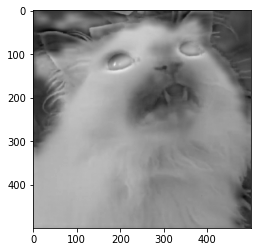

In [5]:
def gaussian_blur_kernel(size, sigma):
    mid = int(size/2)
    gauss = np.array([[np.exp(-((r-mid)**2 + (c-mid)**2)/(2*sigma**2)) for c in range(size)] for r in range(size)])
    return gauss / np.sum(gauss)

def box_filter(size):
  return np.ones((size, size))/size**2

def filterSpace(img, filter):
  return scipy.signal.convolve2d(img, filter, boundary = 'fill', mode = 'same')

def make_hybrid(A, B, filter):
  A = cv2.resize(A, (500, 500)).astype(np.float32)
  B = cv2.resize(B, (500, 500)).astype(np.float32)
  blurA = filterSpace(A, filter)
  blurB = filterSpace(B, filter)
  return blurB + (A-blurA)

#filter = gaussian_blur_kernel(50, 5)
filter = box_filter(20)
A = cv2.imread("thurston1.png", cv2.IMREAD_GRAYSCALE)
B = cv2.imread("thurston2.png", cv2.IMREAD_GRAYSCALE)

hybrid = make_hybrid(A, B, filter)
plt.imshow(hybrid, cmap="gray")

## Problem 2
Fill out code **here**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


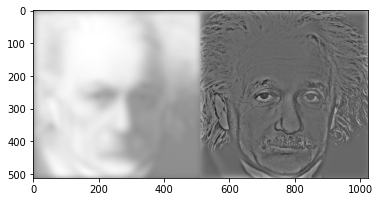

In [6]:
# scale image's mean intensity to 127 for better visualization.
def intensityscale(raw_img):
    
    # scale an image's intensity from [min, max] to [0, 255].
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min) * 255.
    
    # keep the mean to be 127.
    meangray = np.mean(scaled_im)
    scaled_im = scaled_im - meangray + 127.
    
    # clip to [0, 255]
    scaled_im = np.clip(scaled_im, 0, 255)
    
    return scaled_im
  
def separate(raw_img, filter):
  img = intensityscale(raw_img)
  fftImg = np.fft.fft2(img)
  low = filterSpace(raw_img, filter)
  lowFFT = np.fft.fft2(low)
  highFFT = fftImg-lowFFT
  high = np.fft.ifft2(highFFT).astype(np.float32)
  return low, high

filter = gaussian_blur_kernel(50, 10)
einstein = cv2.imread("einsteinandwho.jpg", cv2.IMREAD_GRAYSCALE)
low, high = separate(einstein, filter)
plt.imshow(np.hstack((low, high)), cmap="gray")

## Problem 3.a

In [7]:
def imshow(im, cmap='gray'):
    # clip image from 0-1
    im = np.clip(im, 0, 1)
    plt.imshow(im, cmap=cmap)

In [8]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4;

# horizontal movement from (0, 0) to (0, 1)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1

ff1 = fftshift(fft2(im1))
ff2 = fftshift(fft2(im2))

### Magnify Change
Fill out code **here**

In [9]:
def magnifyChange(im1, im2, magnificationFactor):
    # find phase shift in frequency domain
    im1Dft = fft2(im1)
    im2Dft = fft2(im2)
    phaseShift = np.angle(im2Dft) - np.angle(im1Dft) #TODO
    
    # magnify the phase change in frequency domain
    magnifiedDft = np.abs(im1Dft)*np.exp(1j*(phaseShift*magnificationFactor + np.angle(im1Dft))) #TODO
    
    # what does the magnified phase change cause in image space?
    magnified = ifft2(magnifiedDft).real;
    
    return magnified

**HINT:** If you're not familiar with complex number in python, here's a quickstart.

In [10]:
# create a complex number
x = 1 + 1j
print("x =", x)
print("x.real", x.real, "x.imag", x.imag)

# magnitude and phase of complex number
mag = abs(x)
phase = angle(x)

print("Magnitude", mag)
print("Phase", phase)

# Euler's formula
y = mag * exp(phase * 1j)
print("y =", y)

x = (1+1j)
x.real 1.0 x.imag 1.0
Magnitude 1.4142135623730951
Phase 0.7853981633974483
y = (1.0000000000000002+1j)


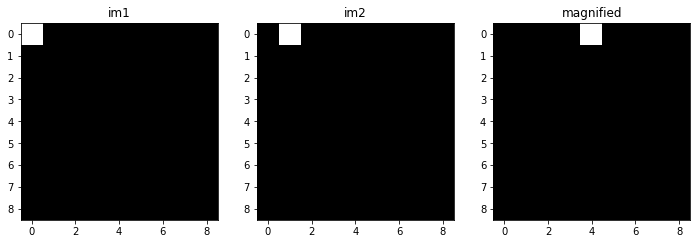

In [11]:
# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor);

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

## Problem 3.b

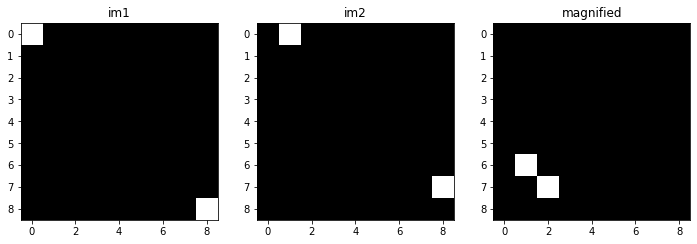

In [12]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor)


plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');


## Problem 3.c
Fill out code **here**

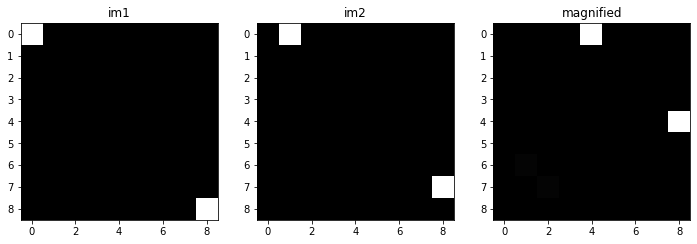

In [16]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# width of our Gaussian window
sigma = 2

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# we will magnify windows of the image and aggregate the results
magnified = np.zeros([imSize, imSize])

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(imSize), np.arange(imSize))

for y in range(0, imSize, 2*sigma):
    for x in range(0, imSize, 2*sigma):
        gaussianMask = np.exp((-(X - x)**2 - (Y - y)**2) / (2*sigma**2)) # TODO
        windowMagnified = magnifyChange(im1*gaussianMask, im2* gaussianMask,\
            magnificationFactor)
        magnified = magnified + windowMagnified
        
plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');

## Problem 3.d

In [17]:
import numpy as np
import cv2

cap = cv2.VideoCapture('bill.avi')

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()
    
    if ret is False:
        break
        
    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

frames size: (60, 240, 240, 3) # (nb_frames, height, width, channel)


### Motion magnification
Fill out code **here**

In [18]:
# 10x magnification of motion
magnificationFactor = 10

# width of Gaussian window
sigma = 13

# alpha for moving average
alpha = 0.5

# we will magnify windows of the video and aggregate the results
magnified = np.zeros_like(frames)

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# iterate over windows of the frames
xRange = list(range(0, width, 2*sigma))
yRange = list(range(0, height, 2*sigma))
numWindows = len(xRange) * len(yRange)
windowIndex = 1

for y in yRange:
    for x in xRange:
        for channelIndex in range(3): # RGB channels
            for frameIndex in range(numFrames):
                
                # create windowed frames
                gaussianMask = np.exp((-(X - x)**2 - (Y - y)**2) / (2*sigma**2))# TODO
                windowedFrames = gaussianMask * frames[frameIndex,:,:,channelIndex]
            
                # initialize moving average of phase for current window/channel
                if frameIndex == 0:
                    windowAveragePhase = angle(fft2(windowedFrames))
                
                windowDft = fft2(windowedFrames)
                
                # compute phase shift and constrain to [-pi, pi] since
                # angle space wraps around
                windowPhaseShift = angle(windowDft) - windowAveragePhase
                windowPhaseShift[windowPhaseShift > pi] = windowPhaseShift[windowPhaseShift > pi] - 2 * pi
                windowPhaseShift[windowPhaseShift < -pi] = windowPhaseShift[windowPhaseShift < -pi] + 2 * pi
                
                # magnify phase shift
                windowMagnifiedPhase = windowPhaseShift*magnificationFactor + windowAveragePhase# TODO
                 
                # go back to image space
                windowMagnifiedDft = np.abs(windowDft)*np.exp(1j*windowMagnifiedPhase)# TODO
                windowMagnified = abs(ifft2(windowMagnifiedDft))
                
                # update moving average
                windowPhaseUnwrapped = windowAveragePhase + windowPhaseShift
                windowAveragePhase = alpha * windowAveragePhase + (1 - alpha) * windowPhaseUnwrapped
                
                # aggregate
                magnified[frameIndex,:,:,channelIndex] = magnified[frameIndex,:,:,channelIndex] + windowMagnified
        
        # print progress
        print('{}/{}'.format(windowIndex, numWindows), end='\r')
        windowIndex += 1

In [19]:
outputs = magnified / np.max(magnified)
for channelIndex in range(3):
    originalFrame = frames[0,:,:,channelIndex]
    magnifiedFrame = outputs[0,:,:,channelIndex]
    scale = np.std(originalFrame[:]) / np.std(magnifiedFrame[:])
    originalMean = np.mean(originalFrame[:])
    magnifiedMean = np.mean(magnifiedFrame[:])
    outputs[:,:,:,channelIndex] = magnifiedMean + scale * (outputs[:,:,:,channelIndex] - magnifiedMean)

outputs = np.clip(outputs, 0, 1)

In [20]:
# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('bill_magnified.avi',fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(outputs[i], 0, 1) * 255).astype(np.uint8)
    
    # write frame to output video
    out.write(frame)

out.release()

In [21]:
# Only for colab downloading videos
try:
    from google.colab import files
    files.download('bill_magnified.avi')
except:
    print("Only for google colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>